Approximate run duration: 10 hours

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
cd /content/drive/MyDrive/Work/Sciencing/Google_CoLab_projects/WWD_Model/WWD_pytorch/wwd-model-fitting/final/

/content/drive/MyDrive/Work/Sciencing/Google_CoLab_projects/WWD_Model/WWD_pytorch/wwd-model-fitting/final


In [3]:
import sys
sys.path.append('code/')

In [4]:

from rww_pytorch_model import RNNWWD
from rww_pytorch_model import Model_fitting
import matplotlib.pyplot as plt # for plotting
import numpy as np # for numerical operations
import pandas as pd # for data manipulation
import seaborn as sns # for plotting 
import time # for timer
import os

In [5]:
def plot_sim_states_outputs(ts, output):
    """
    Plot the simulation states of trained input parameters. 

    Parameters
    ----------
    ts_sim: tensor with node_size X datapoint
        simulated BOLD
    ts: tensor with node_size X datapoint
        empirical BOLD
    E_sim: tensor with node_size X datapoint 
        simulated E 
    I_sim: tensor with node_size X datapoint
        simulated I 
    x_sim: tensor with node_size X datapoint
        simulated x 
    f_sim: tensor with node_size X datapoint
        simulated f 
    v_sim: tensor with node_size X datapoint
        simulated v 
    q_sim: tensor with node_size X datapoint
        simulated q 
    """
    ts_sim = output['simBOLD']
    E_sim = output['E']
    I_sim = output['I'] 
    x_sim = output['x'] 
    f_sim = output['f']
    v_sim = output['v'] 
    q_sim = output['q']
    fig, ax = plt.subplots(5, 2, figsize=(12,8))
    im1 = ax[0,0].imshow(np.corrcoef(ts_sim), cmap = 'bwr')
    ax[0,0].set_title('simFC')
    fig.colorbar(im1, ax=ax[0,0])
    im2 = ax[0,1].imshow(np.corrcoef(ts.T), cmap = 'bwr')
    ax[0,1].set_title('expFC')
    fig.colorbar(im2, ax=ax[0,1])
    ax[1,0].plot(ts_sim.T)
    ax[1,0].set_title('simBOLD')
    ax[1,1].plot(ts)
    ax[1,1].set_title('expBOLD')
    ax[2,0].plot(E_sim.T)
    ax[2,0].set_title('sim E')
    ax[2,1].plot(I_sim.T)
    ax[2,1].set_title('sim I')
    ax[3,0].plot(x_sim.T)
    ax[3,0].set_title('sim x')
    ax[3,1].plot(f_sim.T)
    ax[3,1].set_title('sim f')
    ax[4,0].plot(v_sim.T)
    ax[4,0].set_title('sim v')
    ax[4,1].plot(q_sim.T)
    ax[4,1].set_title('sim q')
    plt.show()
    
def plot_fit_parameters(output):
    g_par = output['g'] 
    gEE_par = output['gEE'] 
    gIE_par = output['gIE'] 
    gEI_par = output['gEI'] 
    g_mean_par = output['gmean'] 
    g_var_par = output['gvar'] 
    cA_par = output['cA'] 
    cB_par = output['cB'] 
    cC_par = output['cC'] 
    sigma_par = output['sigma_state']
    sigma_out_par = output['sigma_bold']
    """
    Plot the simulation states of fitted input parameters. 

    Parameters
    ----------
    g_par: list of fitted parameter values
        for g
    gEE_par: list of fitted parameter values
        for gEE
    gIE_par: list of fitted parameter values
        for gIE
    gEI_par: list of fitted parameter values
        for gEI
    sc_par: list of fitted parameter values
        for structural connectivity
    sc_par: list of fitted parameter values
        for sigma
    """
    fig, ax = plt.subplots(6,2, figsize=(12,8))
    im1 = ax[0,0].plot(g_par)
    ax[0,0].set_title('g')
    
    ax[0,1].plot(gEE_par)
    ax[0,1].set_title('gEE')
    
    ax[1,0].plot(gIE_par)
    ax[1,0].set_title('gIE')
    ax[1,1].plot(gEI_par)
    ax[1,1].set_title('gEI')
    
    ax[2,0].plot(sigma_par)
    ax[2,0].set_title('sc')

    ax[2,1].plot(sigma_out_par)
    ax[2,1].set_title('$\sigma$')
    ax[3,0].plot(g_mean_par)
    ax[3,0].set_title('post mean: g')

    ax[3,1].plot(g_var_par)
    ax[3,1].set_title('post var: g')

    ax[4,0].plot(cA_par)
    ax[4,0].set_title('post poly:A')

    ax[4,1].plot(cB_par)
    ax[4,1].set_title('post poly:B')

    ax[5,0].plot(cC_par)
    ax[5,0].set_title('post poly:C')

37
epoch:  0 0.8089985892754131
epoch:  1 0.8491276170052976
epoch:  2 0.7750065813910697
epoch:  3 0.7551398414840628
epoch:  4 0.8025956097070548
epoch:  5 0.8222921643978934
epoch:  6 0.7948289202681342
epoch:  7 0.8291225606669409
epoch:  8 0.8312448904762312
epoch:  9 0.814589754452367
epoch:  10 0.831100952494863
epoch:  11 0.7479578395175953
epoch:  12 0.8205784615689776
epoch:  13 0.7572224854639199
epoch:  14 0.8310314928151565
epoch:  15 0.8176278986590092
epoch:  16 0.8374269045214583
epoch:  17 0.7748739713479561
epoch:  18 0.8260713212454415
epoch:  19 0.8202145091719435
0.8718733036504489


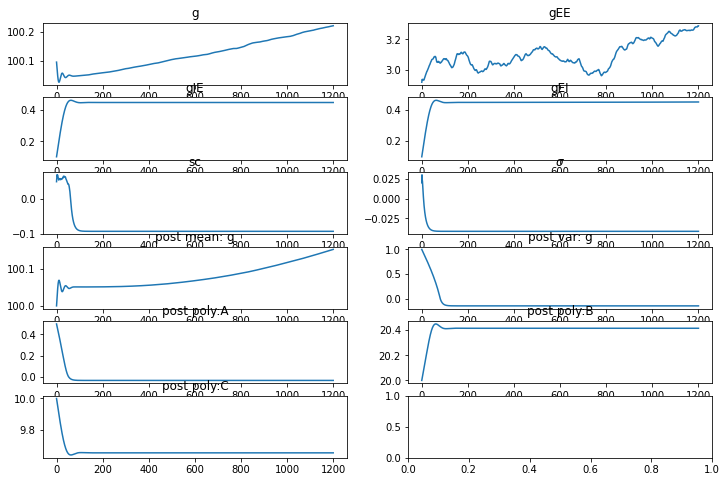

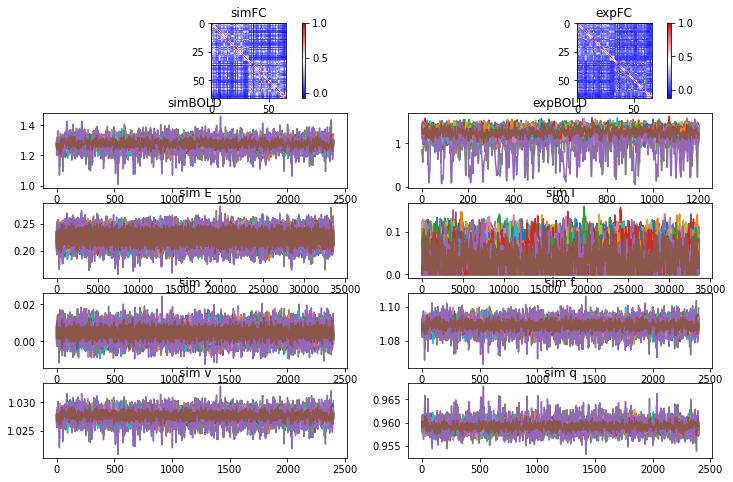

38
epoch:  0 0.586668300154598
epoch:  1 0.7969198930940581
epoch:  2 0.7905246121384407
epoch:  3 0.7571943739218998
epoch:  4 0.8212314469785857
epoch:  5 0.8222758696934018
epoch:  6 0.8719933665508279
epoch:  7 0.8429953137018299
epoch:  8 0.8158685498490468
epoch:  9 0.7364013693179933
epoch:  10 0.8232081614945138
epoch:  11 0.8072238280875795
epoch:  12 0.8103900212745612
epoch:  13 0.8310728679429689
epoch:  14 0.8275622942351384
epoch:  15 0.8181083625547957
epoch:  16 0.8010826386709021
epoch:  17 0.827474997394015
epoch:  18 0.8148527125644021
epoch:  19 0.835797405917339
0.8623762128397722


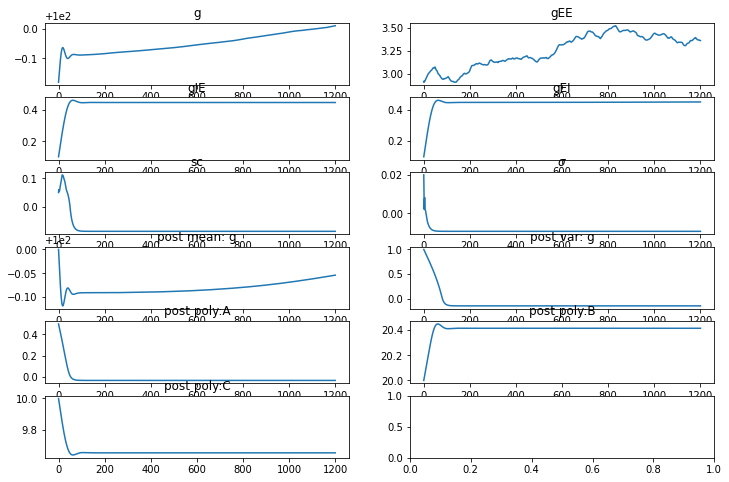

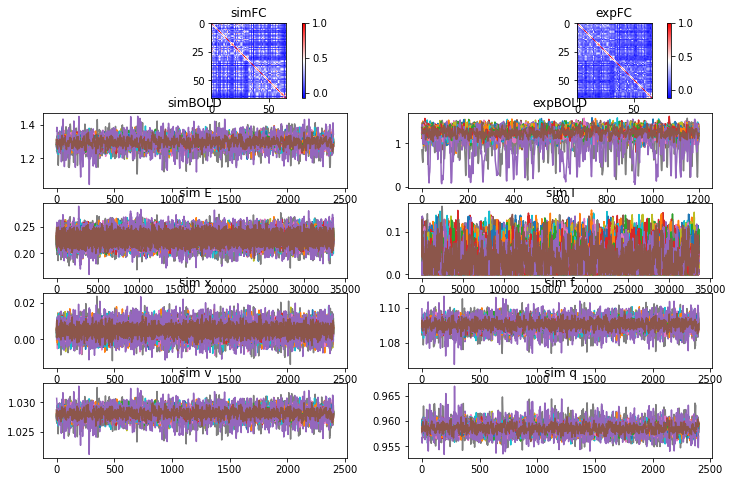

39
epoch:  0 0.6399258207806198
epoch:  1 0.8498317120419103
epoch:  2 0.8246495525160176
epoch:  3 0.8081633828327
epoch:  4 0.7961227772626522
epoch:  5 0.7506753285219254
epoch:  6 0.8199730025035572
epoch:  7 0.6992625519823159
epoch:  8 0.8472390619052308
epoch:  9 0.8147617126434913
epoch:  10 0.781665862641154
epoch:  11 0.8131332129639163
epoch:  12 0.8281840146191352
epoch:  13 0.8237821722660494
epoch:  14 0.841195492027867
epoch:  15 0.8122577395108901
epoch:  16 0.8004459591782579
epoch:  17 0.819782891380414
epoch:  18 0.838872934691616
epoch:  19 0.8279578708379817
0.8539793544758151


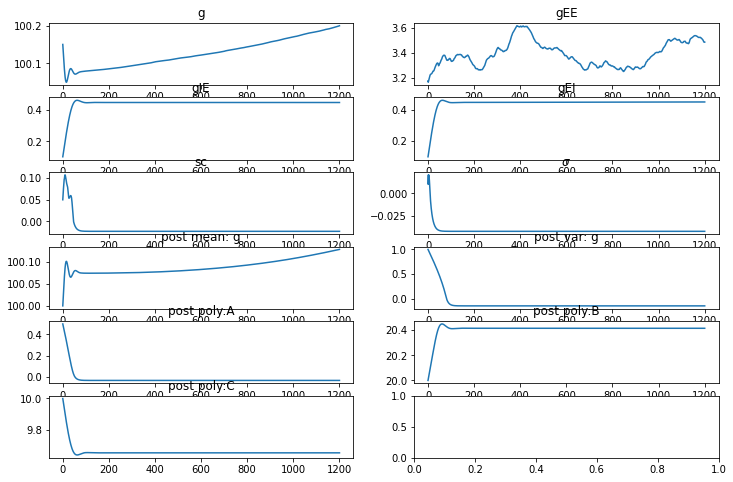

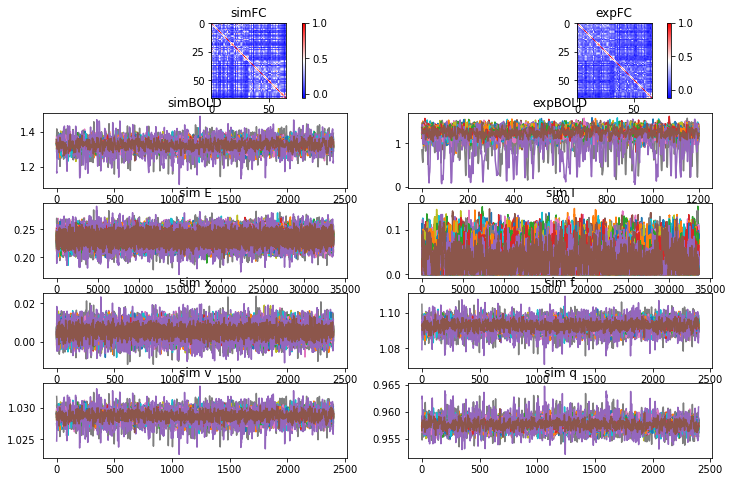

running time is  2258.923551797867 's


In [ ]:
start_time = time.time()


out_dir = '../data/Hagmann/'


for i in range(37,40):
    
    print(i)
    sub = 'sub_'+str(i)
    sc_file = '../data/Hagmann/weights.txt'
    ts_file = '../data/Hagmann/syn_ts.txt'
   
    node_size = 66
    output_size = 66
    num_epoches = 20
    batch_size = 20
    step_size = .05
    input_size = 2
    tr = 0.75

    

    sc_file = '../data/Hagmann/weights.txt'
    sc = np.loadtxt(sc_file)
    sc = sc -np.diag(np.diag(sc))
    sc = 0.5*(sc.T+sc)
    sc = np.log1p(sc)/np.linalg.norm(np.log1p(sc))

    # sythetic ts
    ts_w = np.loadtxt(ts_file)
    ts = ts_w[2400:3600]
    fc_emp = np.corrcoef(ts.T)
    
    model = RNNWWD(input_size, node_size, batch_size, step_size, tr, sc, False, g_mean_ini=100, g_std_ini = .1, gEE_mean_ini= 3, gEE_std_ini = .1)


        
    # call model fit method
    F = Model_fitting(model, ts, num_epoches)

    # fit data(train)

    output_train = F.train()

    
    output_test = F.test(120)
    plot_fit_parameters(output_train)
    plot_sim_states_outputs(ts, output_test)
    
    np.savetxt(out_dir + 'bold_test_4p_'+ sub +'.txt', output_test['simBOLD'])
    np.savetxt(out_dir + 'bold_train_4p_'+ sub +'.txt', output_train['simBOLD'])
    #np.savetxt(out_dir + 'sc_mod_'+ sub +'.txt', sc_mod)
    #np.savetxt(out_dir + 'sc_'+ sub +'.txt', sc)
    g=  output_train['g'][-100:].mean()
    gEE = output_train['gEE'][-100:].mean()
    gEI = output_train['gEI'][-100:].mean()
    gIE = output_train['gIE'][-100:].mean()


    np.savetxt(out_dir + 'parameters_4p_'+ sub +'.txt', np.array([g,gEE, gIE, gEI]).T)
end_time =  time.time()
print('running time is  {0} \'s'.format(end_time - start_time ))

In [ ]:

Syn_ts_sim ={}
Syn_ts_test ={}
Syn_paras = {}
Syn_sc_mod = {}
for i in range(40):
    sub = 'sub_'+str(i)
    

    Syn_ts_test[sub] = np.loadtxt('../data/Hagmann/bold_test_4p_'+ sub +'.txt')
    Syn_ts_sim[sub] = np.loadtxt('../data/Hagmann/bold_train_4p_'+ sub +'.txt')
    Syn_sc_mod[sub] = np.loadtxt('../data/Hagmann/sc_mod_4p_'+ sub +'.txt')
    
    Syn_paras[sub] = np.loadtxt('../data/Hagmann/parameters_4p_'+ sub +'.txt')
    
np.save('../data/Hagmann/Syn_ts_sim_4p.npy', Syn_ts_sim)
np.save('../data/Hagmann/Syn_ts_test_4p.npy', Syn_ts_test)
np.save('../data/Hagmann/Syn_sc_mod_4p.npy', Syn_sc_mod)
np.save('../data/Hagmann/Syn_fitparas_4p.npy', Syn_paras)